In [15]:
import sys
sys.executable

'/usr/bin/python3'

In [16]:
sys.path.append('/home/stav/Projects/token_voken')

In [30]:
import os
import logging
from PIL import Image as PImage

In [18]:
logging.basicConfig(
    format='%(asctime)s,%(msecs)d %(name)s %(levelname)s %(message)s',
    datefmt='%H:%M:%S',
    level=logging.INFO)
logger = logging.getLogger(__name__)

In [19]:
from IPython.display import Video, Image, display

from src.common.display_utils import printmd

# Load Data

In [5]:
from src.components._1_data_loader import load_valid_intervals, load_videos

In [6]:
df_intervals = load_valid_intervals()
df_videos = load_videos(df_intervals)

19:59:24,888 src.components._1_data_loader INFO Loading intervals from /home/stav/Projects/token_voken/resources/df_intervals_oliver.csv..


In [17]:
print(f'Intervals: {df_intervals.shape}')
print(f'Videos: {df_videos.shape}')

Intervals: (2118, 20)
Videos: (123, 1)


# Status

In [24]:
from src.common.status import status_video_downloaded
from src.common.display_utils import display_value_counts

In [25]:
df_videos['status_download'] = df_videos['video_id'].apply(status_video_downloaded)
logger.info('[Status] Video download:')
display_value_counts(df_videos['status_download'], 'Videos Downloaded')

12:05:57,497 __main__ INFO [Status] Video download:
12:05:57,546 matplotlib DEBUG $HOME=/home/stav
12:05:57,547 matplotlib DEBUG CONFIGDIR=/home/stav/.config/matplotlib
12:05:57,548 matplotlib DEBUG matplotlib data path: /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data
12:05:57,551 matplotlib DEBUG loaded rc file /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc
12:05:57,554 matplotlib DEBUG matplotlib version 3.1.3
12:05:57,554 matplotlib DEBUG interactive is False
12:05:57,555 matplotlib DEBUG platform is linux
12:05:57,556 matplotlib DEBUG loaded modules: ['sys', 'builtins', '_frozen_importlib', '_imp', '_thread', '_warnings', '_weakref', 'zipimport', '_frozen_importlib_external', '_io', 'marshal', 'posix', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', 'io', 'abc', '_abc', '_bootlocale', '_locale', 'site', 'os', 'stat', '_stat', 'posixpath', 'genericpath', 'os.path', '_col

12:05:57,591 matplotlib DEBUG CACHEDIR=/home/stav/.cache/matplotlib
12:05:57,592 matplotlib.font_manager DEBUG font search path ['/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf', '/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/afm', '/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/pdfcorefonts']
12:05:57,644 matplotlib.font_manager DEBUG createFontDict: /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralItalic.ttf
12:05:57,646 matplotlib.font_manager DEBUG createFontDict: /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizTwoSymBol.ttf
12:05:57,648 matplotlib.font_manager DEBUG createFontDict: /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBol.ttf
12:05:57,649 matplotlib.font_manager DEBUG createFontDict: /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/cmss10.ttf
12:05:57,651 matplotlib.font_mana

12:05:57,726 matplotlib.font_manager DEBUG createFontDict: /usr/share/fonts/truetype/liberation2/LiberationSans-BoldItalic.ttf
12:05:57,728 matplotlib.font_manager DEBUG createFontDict: /usr/share/fonts/truetype/padauk/Padauk-Bold.ttf
12:05:57,731 matplotlib.font_manager DEBUG createFontDict: /usr/share/fonts/truetype/malayalam/Uroob-Regular.ttf
12:05:57,733 matplotlib.font_manager DEBUG createFontDict: /usr/share/fonts/opentype/urw-base35/NimbusRoman-Regular.otf
12:05:57,734 matplotlib.font_manager DEBUG createFontDict: /usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf
12:05:57,736 matplotlib.font_manager DEBUG createFontDict: /usr/share/fonts/truetype/abyssinica/AbyssinicaSIL-Regular.ttf
12:05:57,738 matplotlib.font_manager DEBUG createFontDict: /usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf
12:05:57,739 matplotlib.font_manager DEBUG createFontDict: /usr/share/fonts/truetype/padauk/PadaukBook-Regular.ttf
12:05:57,741 matplotlib.font_manager DEBUG 

12:05:57,841 matplotlib.font_manager DEBUG createFontDict: /usr/share/fonts/truetype/malayalam/Dyuthi-Regular.ttf
12:05:57,842 matplotlib.font_manager DEBUG createFontDict: /usr/share/fonts/truetype/ttf-khmeros-core/KhmerOSsys.ttf
12:05:57,844 matplotlib.font_manager DEBUG createFontDict: /usr/share/fonts/truetype/ubuntu/UbuntuMono-B.ttf
12:05:57,845 matplotlib.font_manager DEBUG createFontDict: /usr/share/fonts/truetype/dejavu/DejaVuSansMono-Bold.ttf
12:05:57,846 matplotlib.font_manager DEBUG createFontDict: /usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf
12:05:57,847 matplotlib.font_manager DEBUG createFontDict: /usr/share/fonts/truetype/tlwg/TlwgTypist.ttf
12:05:57,849 matplotlib.font_manager DEBUG createFontDict: /usr/share/fonts/truetype/lyx/msam10.ttf
12:05:57,850 matplotlib.font_manager DEBUG createFontDict: /usr/share/fonts/truetype/tlwg/Kinnari-Bold.ttf
12:05:57,852 matplotlib.font_manager DEBUG createFontDict: /usr/share/fonts/truetype/samyak-fonts/Samyak-Guja

12:05:57,953 matplotlib.font_manager DEBUG createFontDict: /usr/share/fonts/truetype/liberation2/LiberationSerif-Bold.ttf
12:05:57,953 matplotlib.font_manager DEBUG createFontDict: /usr/share/fonts/truetype/dejavu/DejaVuSans.ttf
12:05:57,954 matplotlib.font_manager DEBUG createFontDict: /usr/share/fonts/truetype/fonts-yrsa-rasa/Rasa-SemiBold.ttf
12:05:57,956 matplotlib.font_manager DEBUG createFontDict: /usr/share/fonts/truetype/tlwg/Sawasdee-BoldOblique.ttf
12:05:57,958 matplotlib.font_manager DEBUG createFontDict: /usr/share/fonts/truetype/dejavu/DejaVuSansMono.ttf
12:05:57,958 matplotlib.font_manager DEBUG createFontDict: /usr/share/fonts/truetype/kacst/mry_KacstQurn.ttf
12:05:57,960 matplotlib.font_manager DEBUG createFontDict: /usr/share/fonts/truetype/dejavu/DejaVuSans-BoldOblique.ttf
12:05:57,961 matplotlib.font_manager DEBUG createFontDict: /usr/share/fonts/truetype/dejavu/DejaVuSerif.ttf
12:05:57,961 matplotlib.font_manager DEBUG createFontDict: /usr/share/fonts/truetype/tlwg/

12:05:58,61 matplotlib.font_manager DEBUG createFontDict: /usr/share/fonts/truetype/freefont/FreeSansBold.ttf
12:05:58,63 matplotlib.font_manager DEBUG createFontDict: /usr/share/fonts/truetype/freefont/FreeMonoBoldOblique.ttf
12:05:58,64 matplotlib.font_manager DEBUG createFontDict: /usr/share/fonts/truetype/liberation2/LiberationMono-BoldItalic.ttf
12:05:58,66 matplotlib.font_manager DEBUG createFontDict: /usr/share/fonts/truetype/ubuntu/Ubuntu-M.ttf
12:05:58,68 matplotlib.font_manager DEBUG createFontDict: /usr/share/fonts/truetype/lohit-devanagari/Lohit-Devanagari.ttf
12:05:58,69 matplotlib.font_manager DEBUG createFontDict: /usr/share/fonts/opentype/malayalam/Gayathri-Regular.otf
12:05:58,71 matplotlib.font_manager DEBUG createFontDict: /usr/share/fonts/opentype/urw-base35/NimbusSansNarrow-Regular.otf
12:05:58,72 matplotlib.font_manager DEBUG createFontDict: /usr/share/fonts/truetype/fonts-orya-extra/utkal.ttf
12:05:58,73 matplotlib.font_manager DEBUG createFontDict: /usr/share/fo

12:05:58,196 matplotlib.font_manager DEBUG createFontDict: /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/afm/phvb8an.afm
12:05:58,199 matplotlib.font_manager DEBUG createFontDict: /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/pdfcorefonts/Times-BoldItalic.afm
12:05:58,205 matplotlib.font_manager DEBUG createFontDict: /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/pdfcorefonts/Times-Roman.afm
12:05:58,211 matplotlib.font_manager DEBUG createFontDict: /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/pdfcorefonts/Courier-Oblique.afm
12:05:58,214 matplotlib.font_manager DEBUG createFontDict: /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/afm/pplri8a.afm
12:05:58,217 matplotlib.font_manager DEBUG createFontDict: /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/afm/pzdr.afm
12:05:58,220 matplotlib.font_manager DEBUG createFontDict: /opt/anaconda3/lib/python3.7/sit

12:05:58,574 matplotlib.font_manager DEBUG createFontDict: /usr/share/fonts/X11/Type1/c0583bt_.afm
12:05:58,577 matplotlib.font_manager DEBUG createFontDict: /usr/share/fonts/type1/urw-base35/D050000L.afm
12:05:58,579 matplotlib.font_manager DEBUG createFontDict: /usr/share/fonts/type1/urw-base35/P052-BoldItalic.afm
12:05:58,591 matplotlib.font_manager DEBUG createFontDict: /usr/share/fonts/type1/urw-base35/NimbusMonoPS-BoldItalic.afm
12:05:58,598 matplotlib.font_manager DEBUG createFontDict: /usr/share/fonts/type1/urw-base35/NimbusSans-BoldItalic.afm
12:05:58,609 matplotlib.font_manager DEBUG createFontDict: /usr/share/fonts/type1/urw-base35/C059-Italic.afm
12:05:58,622 matplotlib.font_manager DEBUG createFontDict: /usr/share/fonts/type1/urw-base35/NimbusSans-Bold.afm
12:05:58,634 matplotlib.font_manager DEBUG createFontDict: /usr/share/fonts/type1/urw-base35/URWBookman-DemiItalic.afm
12:05:58,647 matplotlib.font_manager DEBUG createFontDict: /usr/share/fonts/X11/Type1/c0582bt_.afm
12

,status_download
True,123


# Videos

In [22]:
Video("/home/stav/Data/PATS_DATA/Videos/oliver/pDVmldTurqk/105562/105562.mp4", width=800, height=300)

In [21]:
Video("/home/stav/Data/PATS_DATA/Videos/oliver/pDVmldTurqk/106080/106080.mp4", width=800, height=300)

In [14]:
%%HTML
<video width=400 controls>
  <source src="/home/stav/Data/PATS_DATA/Videos/oliver/pDVmldTurqk/106080/106080.mp4" type="video/mp4">
</video>

In [30]:
import ipywidgets as wd
from IPython.display import HTML

In [34]:
def showvideo(video_number):
    display(HTML(
        '<video width="400" height="400" controls><source src=/home/stav/Data/PATS_DATA/Videos/oliver/pDVmldTurqk/106080/106080.mp4" type="video/mp4"></video>'
    ))

In [35]:
wd.interact(showvideo, video_number = [1, 2, 3, 4]);

# Frames

In [19]:
!ls /home/stav/Data/PATS_DATA/Videos/oliver/pDVmldTurqk/106080/Frames/

00000.jpg  00018.jpg  00036.jpg  00054.jpg  00072.jpg  00090.jpg  00108.jpg
00001.jpg  00019.jpg  00037.jpg  00055.jpg  00073.jpg  00091.jpg  00109.jpg
00002.jpg  00020.jpg  00038.jpg  00056.jpg  00074.jpg  00092.jpg  00110.jpg
00003.jpg  00021.jpg  00039.jpg  00057.jpg  00075.jpg  00093.jpg  00111.jpg
00004.jpg  00022.jpg  00040.jpg  00058.jpg  00076.jpg  00094.jpg  00112.jpg
00005.jpg  00023.jpg  00041.jpg  00059.jpg  00077.jpg  00095.jpg  00113.jpg
00006.jpg  00024.jpg  00042.jpg  00060.jpg  00078.jpg  00096.jpg  00114.jpg
00007.jpg  00025.jpg  00043.jpg  00061.jpg  00079.jpg  00097.jpg  00115.jpg
00008.jpg  00026.jpg  00044.jpg  00062.jpg  00080.jpg  00098.jpg  00116.jpg
00009.jpg  00027.jpg  00045.jpg  00063.jpg  00081.jpg  00099.jpg  00117.jpg
00010.jpg  00028.jpg  00046.jpg  00064.jpg  00082.jpg  00100.jpg  00118.jpg
00011.jpg  00029.jpg  00047.jpg  00065.jpg  00083.jpg  00101.jpg  00119.jpg
00012.jpg  00030.jpg  00048.jpg  00066.jpg  00084.jpg  00102.jpg  00120.jpg
00013.jpg  0

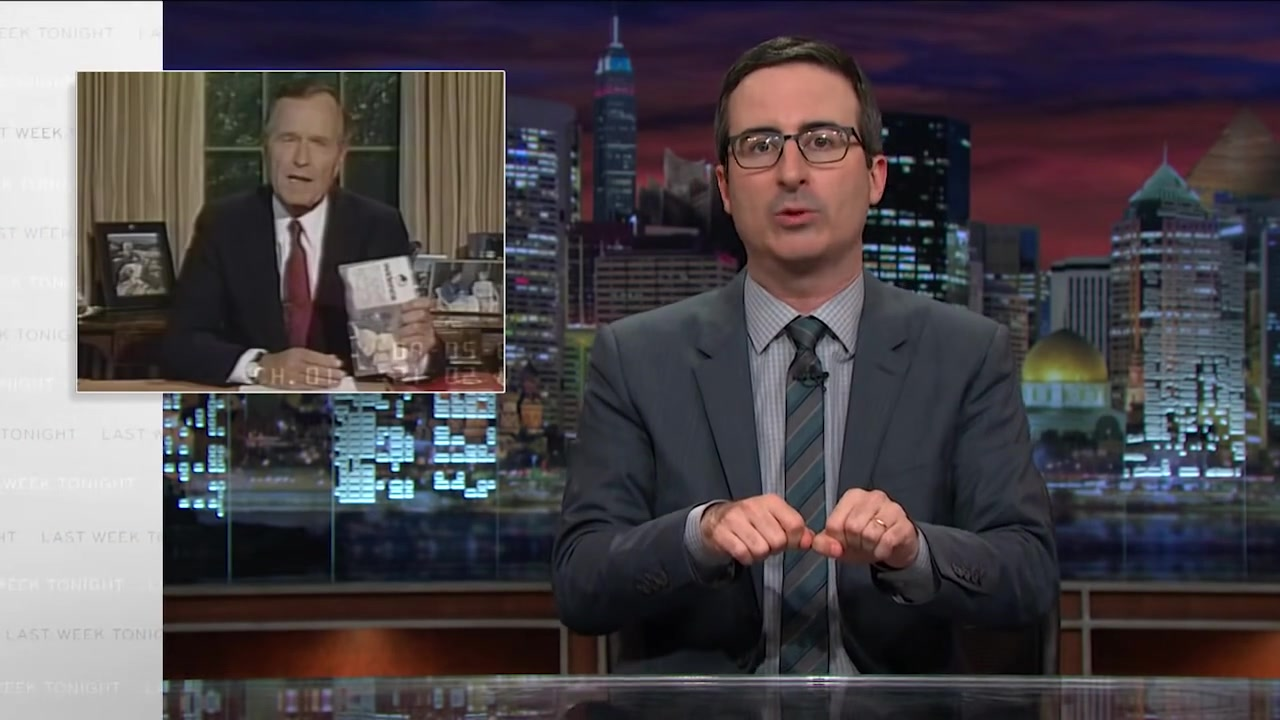

In [20]:
Image("/home/stav/Data/PATS_DATA/Videos/oliver/pDVmldTurqk/106080/Frames/00105.jpg")

# Faces

In [31]:
def display_faces(path):
    for file in os.listdir(path):
        abs_path = os.path.join(path, file)
        display(Image(abs_path))
        im = PImage.open(abs_path)
        width, height = im.size
        printmd(f'**({width} × {height}) {abs_path}**')

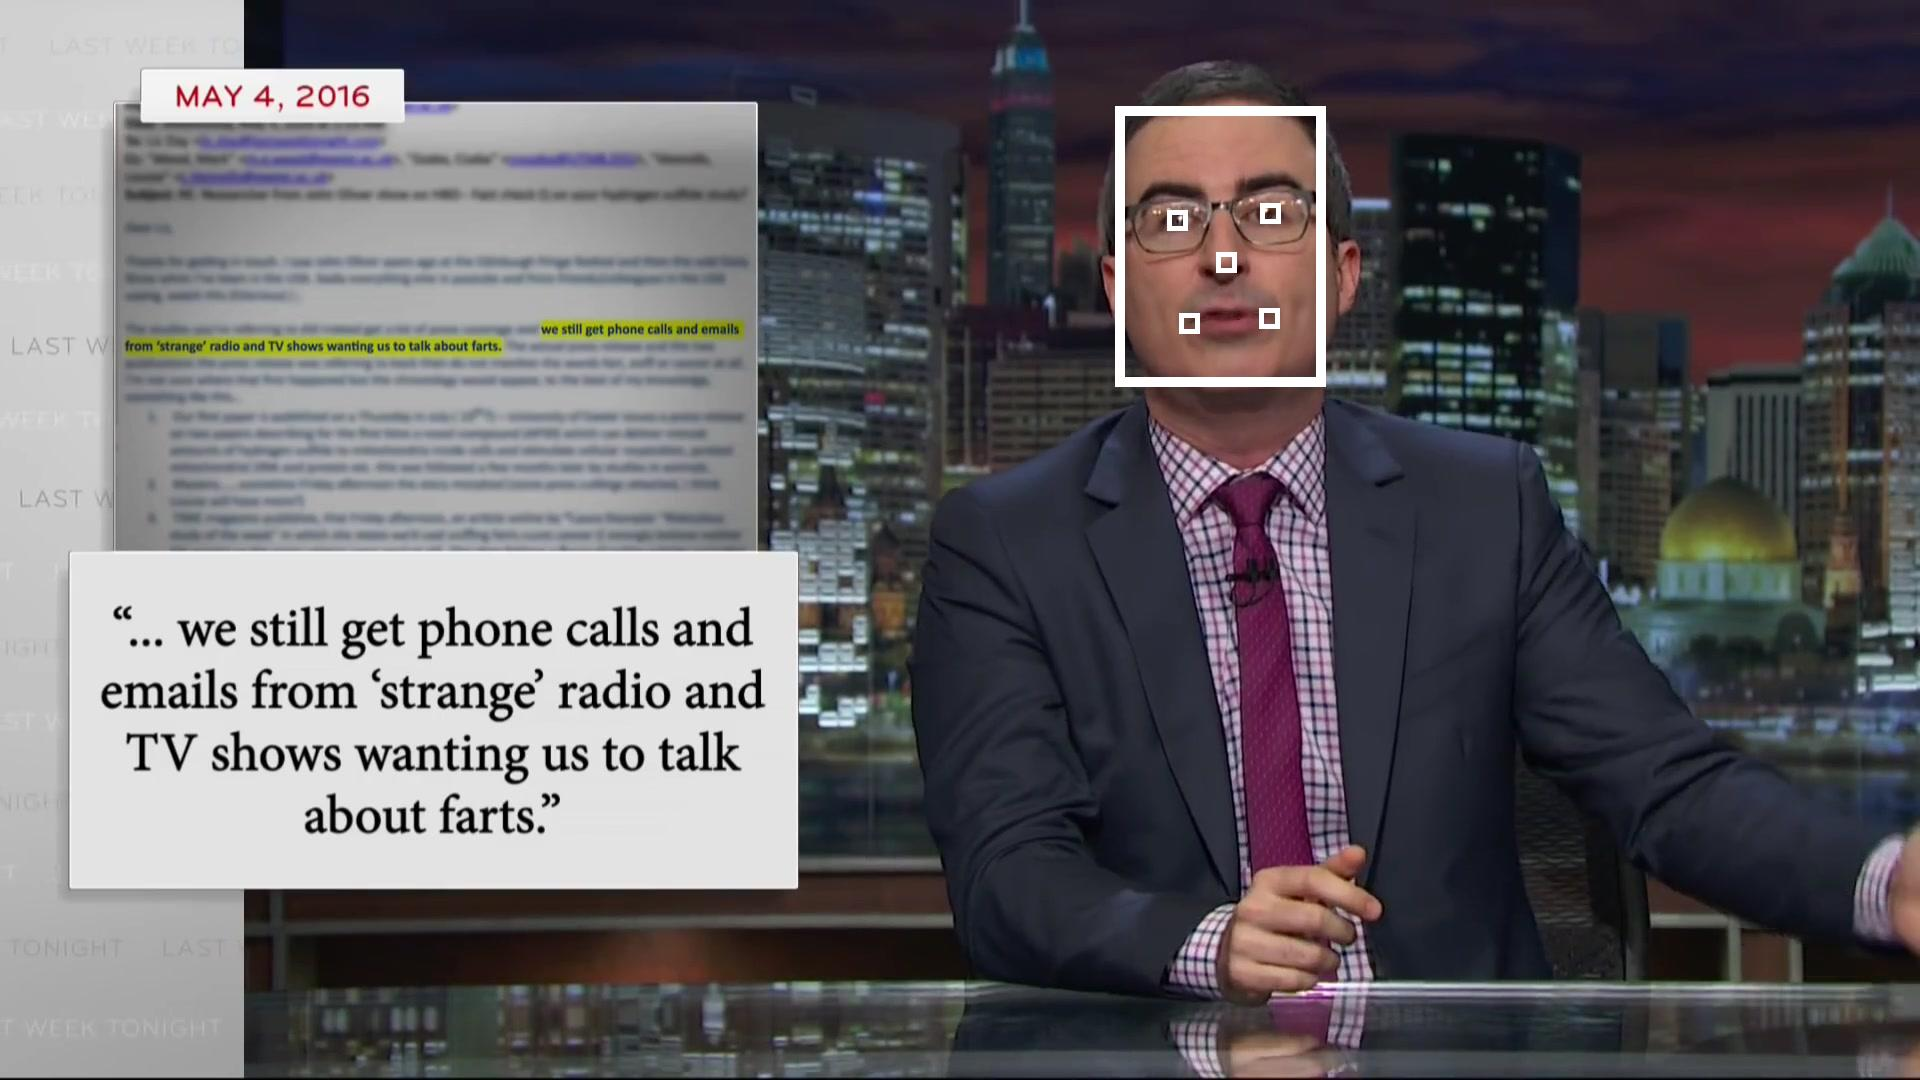

**(1920 × 1080) /home/stav/Data/PATS_DATA/Videos/oliver/0Rnq1NpHdmw/101462/FacesAll/00142/annotated_faces.jpg**

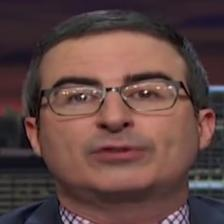

**(224 × 224) /home/stav/Data/PATS_DATA/Videos/oliver/0Rnq1NpHdmw/101462/FacesAll/00142/face_0.jpg**

In [32]:
display_faces('/home/stav/Data/PATS_DATA/Videos/oliver/0Rnq1NpHdmw/101462/FacesAll/00142')

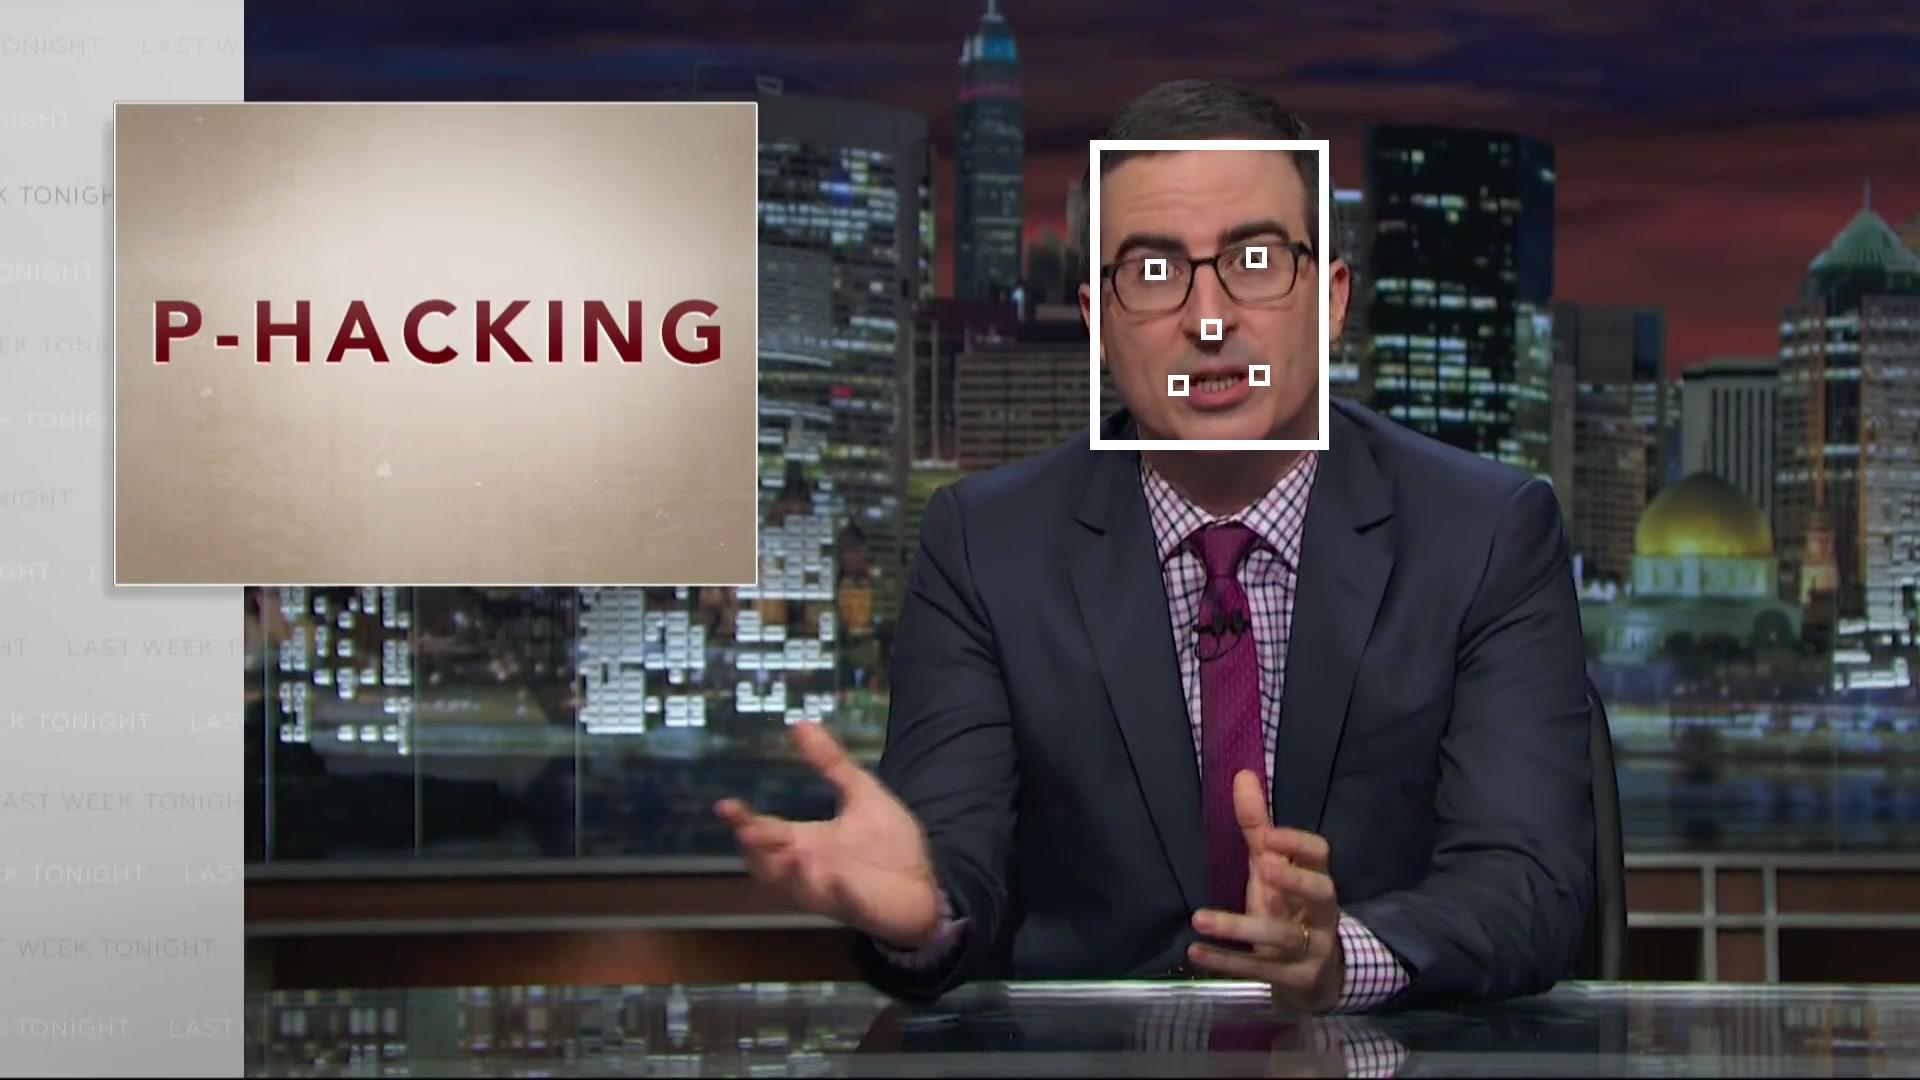

**(1920 × 1080) /home/stav/Data/PATS_DATA/Videos/oliver/0Rnq1NpHdmw/102749/FacesAll/00141/annotated_faces.jpg**

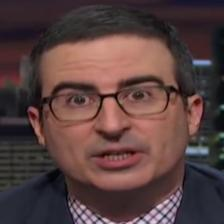

**(224 × 224) /home/stav/Data/PATS_DATA/Videos/oliver/0Rnq1NpHdmw/102749/FacesAll/00141/face_0.jpg**

In [33]:
display_faces('/home/stav/Data/PATS_DATA/Videos/oliver/0Rnq1NpHdmw/102749/FacesAll/00141')